# Day 10 | Second week task

As an example of SVM and PCA in action, you will solve the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures 3,000 pixels each.
A fetcher for the dataset is built into Scikit-Learn:

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plotter
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print(faces.data.shape)
print(faces.target)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(1348, 2914)
[1 3 3 ... 7 3 5]


1. Try to plot the faces from *faces.images* matrix and faces.target_names as labels. TIP: use **subplots** and **imshow** functions from matplotlib

2. Make pipeline of SVM and RandomizedPCA model using sklearn library (make_pipeline command).TIP: use nonlinear Gaussian kernel in SVM (**rbf**) and number of PCA components (try **50** and **150**).  

3. For the sake of testing our classifier output, you have to will split the data into a training and testing set. TIP: use **training_test_split function** from _sklearn.model_selection_

4. Perform a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel) in SVM, to find the best model. TIP: use **GridSearchCV** from _sklearn.model_selection_, use following values for 'svc__C': [1, 5, 10, 50] and 'svc__gamma: [0.0001, 0.0005, 0.001, 0.005]. Fit the training data to find out the parameters. 

5. Print best parameters from grid search. If The optimal values fall  fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

6. Use best estimator (best_estimator_ function) from grid search to predict labels for test sample generated in 3). TIP: use **predict** function  

7. Use few test images to check the fit accuracy and plot images with estimator assigned labels like in 1).



Let's plot a few of these faces to see what we're working with:

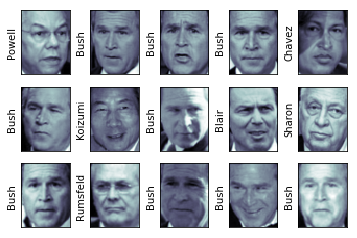

In [2]:
fig, ax = plotter.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1], color = "black")

Each image contains [62×47] or nearly 3,000 pixels.
We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis  to extract 150 fundamental components to feed into our support vector machine classifier.
We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline using make_pipeline function

In [3]:
x = faces.data
y = faces.target

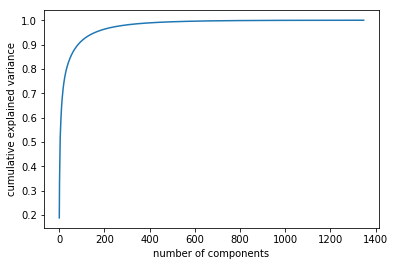

In [45]:
from sklearn.decomposition import PCA
pca = PCA().fit(faces.data)
plotter.plot(np.cumsum(pca.explained_variance_ratio_))
plotter.xlabel('number of components')
plotter.ylabel('cumulative explained variance');

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

std = StandardScaler()
pca = PCA(n_components= 150, svd_solver='randomized',random_state=42, whiten=True)
svc = SVC(kernel = 'rbf', probability = True,random_state=42)
pipe = make_pipeline(pca,svc)
#pipe.fit(x,y)

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=42)

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

clf = GridSearchCV(pipe,
             param_grid={'svc__kernel':('linear', 'rbf'),'svc__C': [0.3, 1, 5, 10, 50],'svc__gamma': [0.0001, 0.0005, 0.001, 0.005] })
clf.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__kernel': ('linear', 'rbf'), 'svc__C': [0.3, 1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
clf.best_score_

0.8235294117647058

In [76]:
clf.best_params_

{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

In [77]:
pred = clf.best_estimator_.predict(x_test)

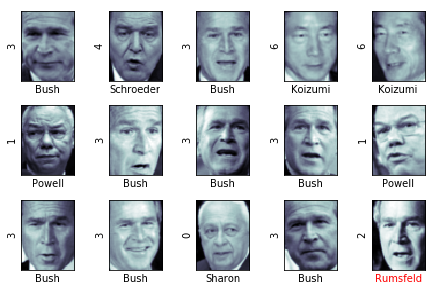

In [78]:
fig, ax = plotter.subplots(3, 5)
plotter.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(faces.images[0].shape),
              cmap=plotter.cm.bone)
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(pred[i], color = "black")
    if faces.target_names[pred[i]] == faces.target_names[y_test[i]]:
        axi.set_xlabel(faces.target_names[pred[i]].split()[-1], color = "black")
    else:
        axi.set_xlabel(faces.target_names[pred[i]].split()[-1], color = "red")
    

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8456591639871383